In [ ]:
#pip install -U matplotlib #install latest version

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go



---







## Loading Data

In [2]:
fraud_df = pd.read_csv("/content/fraud_oracle.csv")
fraud_df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [3]:
fraud_df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [4]:
#df for positive fraud
found_df = fraud_df.loc[fraud_df['FraudFound_P'] == 1]



---






## **Visualizing Data**

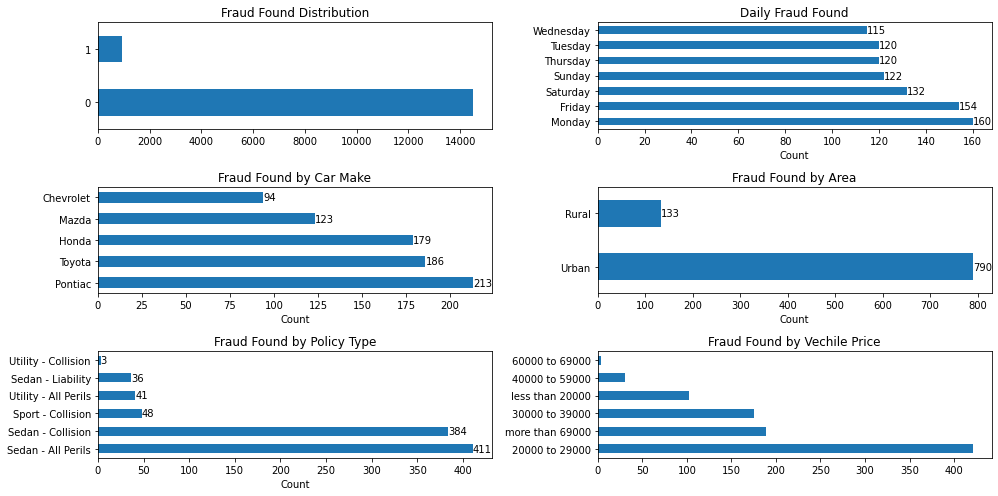

In [5]:
#visualization of some distributions 

#plot 1:
plt.subplot(3, 2, 1)
ax1 = fraud_df['FraudFound_P'].value_counts().plot(kind='barh', title='Fraud Found Distribution', figsize=(14, 7))

#plot 2:
plt.subplot(3, 2, 2)
ax2 = found_df['DayOfWeek'].value_counts().plot(kind='barh', title='Daily Fraud Found', figsize=(14, 7)) 
ax2.set_xlabel("Count")
ax2.bar_label(ax2.containers[0])

#plot 3:
plt.subplot(3, 2, 3)
ax3 = found_df['Make'].value_counts().head(5).plot(kind='barh', title='Fraud Found by Car Make', figsize=(14, 7))
ax3.set_xlabel("Count")
ax3.bar_label(ax3.containers[0])

#plot 4:
plt.subplot(3, 2, 4)
ax4 = found_df['AccidentArea'].value_counts().plot(kind='barh', title='Fraud Found by Area', figsize=(14, 7))
ax4.set_xlabel("Count")
ax4.bar_label(ax4.containers[0])

#plot 5:
plt.subplot(3, 2, 5)
ax5 = found_df['PolicyType'].value_counts().plot(kind='barh', title='Fraud Found by Policy Type', figsize=(14, 7))
ax5.set_xlabel("Count")
ax5.bar_label(ax5.containers[0])

#plot 6:
plt.subplot(3, 2, 6)
ax6 = found_df['VehiclePrice'].value_counts().plot(kind='barh', title='Fraud Found by Vechile Price', figsize=(14, 7))

plt.tight_layout()
plt.show()

In [6]:
#"Outcome Plot"

top_cars = ['Chevrolet', 'Mazda', 'Honda', 'Toyota', 'Pontiac']
top_cars_df = fraud_df.loc[fraud_df['Make'].isin(top_cars)]

#dimenssions
make_dim = go.parcats.Dimension(
    values = top_cars_df.Make, label = "Car Make"
)
area_dim = go.parcats.Dimension(
    values = top_cars_df.AccidentArea, label = "Accident Area"
)
policyt_dim = go.parcats.Dimension(
    values = top_cars_df.PolicyType, label = "Policy Type"
)
price_dim = go.parcats.Dimension(
    values = top_cars_df.VehiclePrice, label = "Vehicle Price"
)
ageholder_dim = go.parcats.Dimension(
    values = top_cars_df.AgeOfPolicyHolder, label = "Age"
)
witness_dim = go.parcats.Dimension(
    values = top_cars_df.WitnessPresent, label = "Witness Present"
)
outcome_dim = go.parcats.Dimension(
    values = top_cars_df.FraudFound_P, label = "Fraud Outcome", categoryarray=[0, 1],
    ticktext=['No Fraud Claim', 'Fraud Claim']
)

# Create parcats trace
color = top_cars_df.FraudFound_P;
colorscale = [[0, 'lightsteelblue'], [1, 'red']];

#plot
fig = go.Figure(data = [go.Parcats(dimensions=[policyt_dim, ageholder_dim, make_dim, price_dim, area_dim, witness_dim, outcome_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 12, 'family': 'Arial Black'},
        tickfont={'size': 10, 'family': 'Times'},
        arrangement='freeform')])

fig.show()

Using some of the visual techniques displayed above (
*feel free to use it on a different match of columns and experiment*) I was able to connect some dots between which features might be a stronger indicator (*talking about you **Pontiacs** in **Urban** areas* 🏎🌆). This can conclude this visual EDA and now let's see how TensorFlow will perform in coming up with answers🤖



---






## Binary Classification with Keras Deep Learning

In [7]:
#pip install scikeras[tensorflow]

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [39]:
#columns that need to be encoded
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
obj_features = fraud_df.select_dtypes(exclude=numerics).columns.tolist()

for i in obj_features:
  fraud_df[i] = fraud_df[i].astype('category')
  fraud_df[i] = fraud_df[i].cat.codes

#print(fraud_df.dtypes)
print(fraud_df.shape)

(15420, 33)


In [35]:
#split 
X = fraud_df.loc[:, fraud_df.columns != 'FraudFound_P']
Y = fraud_df['FraudFound_P']